In [66]:
#install libraries needed
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install joblib

In [22]:
# Load dataset & preview

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read from heart.csv to understand data
df = pd.read_csv('heart.csv')

print("Data Loaded Successfully!")
print(f"Original Shape: {df.shape} (Rows, Columns)")

# Preview first 5 rows
print("\n----- First 5 Rows -----")
display(df.head())

Data Loaded Successfully!
Original Shape: (1025, 14) (Rows, Columns)

----- First 5 Rows -----


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [67]:
# Data preprosessing (reomve if duplicate)

# Duplicate rows checking
duplicate_count = df.duplicated().sum()
print(f" Found {duplicate_count} duplicate rows.")

# Reomve if duplicate occured
if duplicate_count > 0:
    df.drop_duplicates(inplace=True)
    print(f" Duplicates removed. New Shape: {df.shape}")
else:
    print(" No duplicates found. Data is clean.")

 Found 723 duplicate rows.
 Duplicates removed. New Shape: (302, 14)


In [68]:
# Missing value checking

missing_values = df.isnull().sum()
print("----- Missing Values Count -----")
print(missing_values[missing_values > 0])

if df.isnull().sum().sum() > 0:
    df.fillna(df.mean(), inplace=True)
    print("\n Missing values filled with column mean.")
else:
    print("\n No missing values detected.")

----- Missing Values Count -----
Series([], dtype: int64)

 No missing values detected.


In [69]:
# Encode label to numeric form

# Checking for every rows
# 'objects' means string
cat_cols = df.select_dtypes(include=['object']).columns

print(f"Checking for categorical (text) variables...")

if len(cat_cols) > 0:
    # Encode if nessasary
    print(f"Found text columns: {list(cat_cols)}")
    print("Converting to numeric format (Label Encoding)...")
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    for col in cat_cols:
        df[col] = le.fit_transform(df[col])
else:
    # Print this if already numeric
    print(" All features are already numeric. No encoding needed.")

# Display current data types
print("\n----- Current Data Types -----")
print(df.dtypes)

Checking for categorical (text) variables...
 All features are already numeric. No encoding needed.

----- Current Data Types -----
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [13]:
# Step 6: Final dataset preview

print("----- Final Dataset Info -----")
df.info()

print("\n----- Final Data Preview -----")
display(df.head())

----- Final Dataset Info -----
<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB

----- Final Data Preview -----


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [71]:
# Split & normalization

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define (x) & target (y)
X = df.drop(columns=['target'])
y = df['target']

# Split training & test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Data Split & Normalized successfully.")
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

Data Split & Normalized successfully.
Training samples: 241
Testing samples: 61


In [72]:
# Random forest classifier (RFC)

from sklearn.ensemble import RandomForestClassifier

# Model initialising
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Model training
print(" Training the model...")
model.fit(X_train, y_train)
print(" Model trained successfully!")

# Prediction
y_pred = model.predict(X_test)

 Training the model...
 Model trained successfully!


In [58]:
# Model Accuracy

from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {acc*100:.2f}%")

Model Accuracy: 98.54%


In [59]:
# Classification report

from sklearn.metrics import classification_report

print("---------- Detailed Classification Report ----------")
# 直接打印标准的文本报告
print(classification_report(y_test, y_pred))

---------- Detailed Classification Report ----------
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



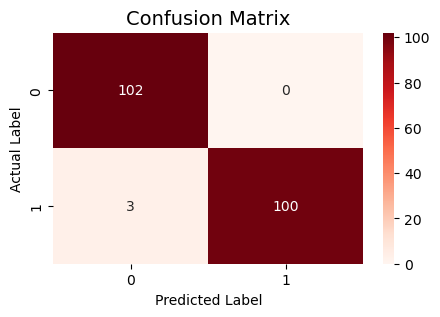

In [61]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix', fontsize=14)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

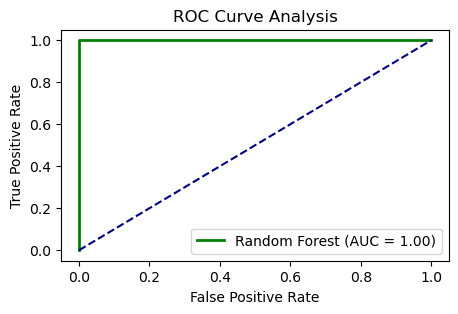

In [62]:
# Receiver operating characteristic (ROC) curve

from sklearn.metrics import roc_curve, auc

# Probabilities
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(5, 3))
plt.plot(fpr, tpr, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Analysis')
plt.legend(loc="lower right")
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_26996\3447960280.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=forest_importances.values, y=forest_importances.index, palette="viridis")


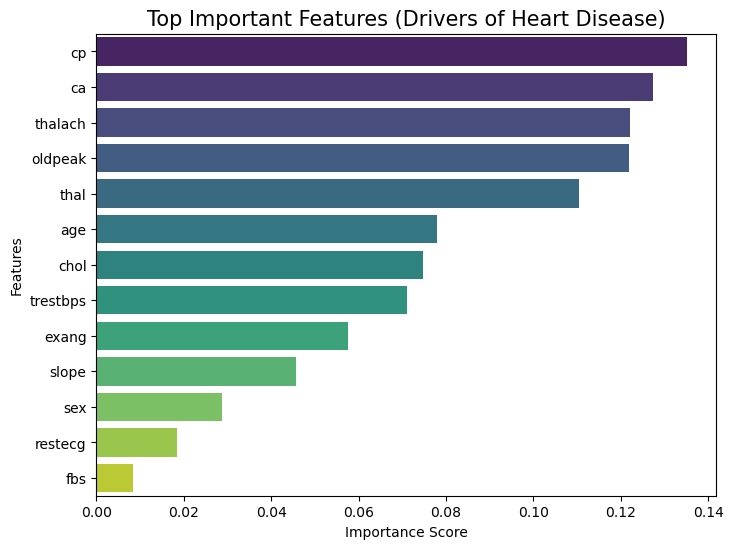

Top 3 Most Important Features:
cp         0.135072
ca         0.127327
thalach    0.122169
dtype: float64


In [48]:
# Feature importance in (RFC)

# Obtain important values
importances = model.feature_importances_
feature_names = X.columns

# Convert and sort to data frames
forest_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=forest_importances.values, y=forest_importances.index, palette="viridis")

plt.title("Top Important Features (Drivers of Heart Disease)", fontsize=15)
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# Print top 3
print("Top 3 Most Important Features:")
print(forest_importances.head(3))